In [1]:
import pandas as pd

pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data
import datetime as dt
import matplotlib.pyplot as plt
    
%matplotlib inline 

In [2]:
import datetime as dt

In [3]:
start = dt.datetime(2000,1,1)
start

datetime.datetime(2000, 1, 1, 0, 0)

In [17]:
wbdf = pd.read_csv('wbdf.csv')
us = pd.read_csv('us.csv')

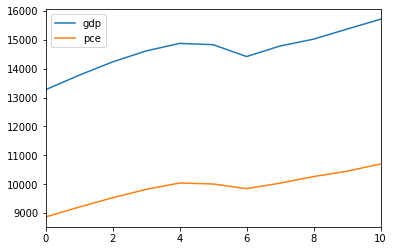

In [5]:
fig, axe = plt.subplots()
us.plot(ax=axe)

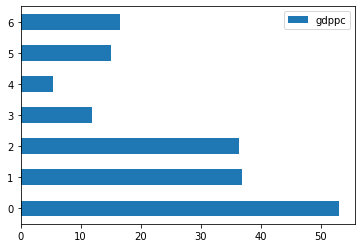

In [6]:
fig, axe = plt.subplots()
wbdf.plot.barh(ax=axe)

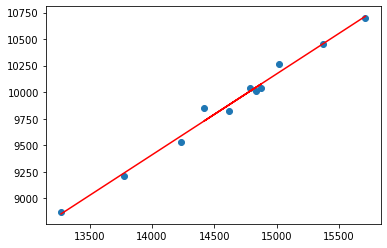

In [7]:
from numpy.polynomial.polynomial import polyfit
x=us['gdp']
y=us['pce']

b, m = polyfit(x, y, 1)

fig, axe = plt.subplots()  
axe.scatter(x,y) 
axe.plot(x, b+ m*x,'r')

In [9]:
start = dt.datetime(2000,1,1)
codes = ["GDPC1", "PCECC96", "GPDIC1", "GCEC1","EXPGSC1","IMPGSC1"]
usdata = data.DataReader(codes, "fred", start)
usdata.columns = ["gdp", "cons","invs", "gov", "exp", "imp"]
usdata.head()

,gdp,cons,invs,gov,exp,imp
DATE,,,,,,
2000-01-01,12924.179,8520.710,2257.109,2645.393,1337.203,1853.884
2000-04-01,13160.842,8603.007,2390.733,2671.254,1375.203,1911.437
2000-07-01,13178.419,8687.485,2367.274,2659.687,1408.783,1978.137
2000-10-01,13260.506,8762.205,2371.809,2675.695,1396.844,1977.750
2001-01-01,13222.690,8797.280,2264.202,2716.773,1376.171,1946.136


In [10]:
var_list = ["gdp", "cons"]

for var in var_list:
    new_name = var + "_growth"
    usdata[new_name] = 100*4*usdata[var].pct_change()
    
usdata.head()

,gdp,cons,invs,gov,exp,imp,gdp_growth,cons_growth
DATE,,,,,,,,
2000-01-01,12924.179,8520.710,2257.109,2645.393,1337.203,1853.884,NaN,NaN
2000-04-01,13160.842,8603.007,2390.733,2671.254,1375.203,1911.437,7.324659,3.863387
2000-07-01,13178.419,8687.485,2367.274,2659.687,1408.783,1978.137,0.534221,3.927836
2000-10-01,13260.506,8762.205,2371.809,2675.695,1396.844,1977.750,2.491558,3.440351
2001-01-01,13222.690,8797.280,2264.202,2716.773,1376.171,1946.136,-1.140711,1.601195


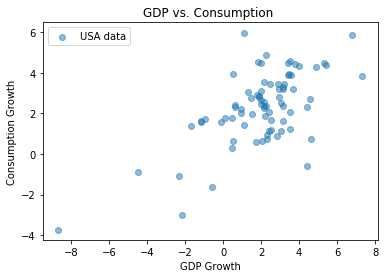

In [11]:
fig, ax = plt.subplots()
ax.scatter(usdata["gdp_growth"], usdata["cons_growth"],alpha= 0.50)
ax.set_title('GDP vs. Consumption ', loc='center') 
ax.set_xlabel("GDP Growth")
ax.set_ylabel("Consumption Growth")
ax.legend(["USA data"],frameon=True)
fig.savefig("us_gdp_consumption.png", bbox_inches = "tight", dip = 1200)

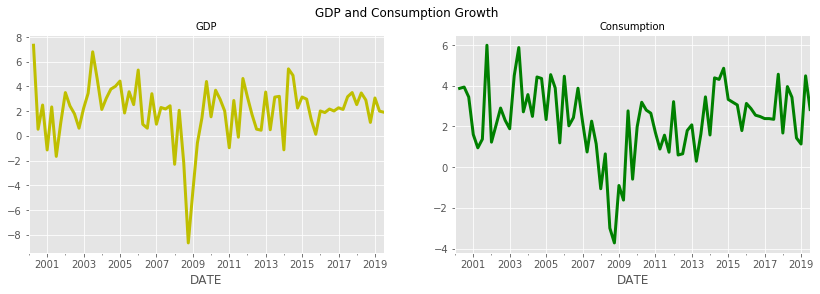

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (14,4)) 

usdata.gdp_growth.plot(ax = ax[0], color = 'y', linewidth = 3.0) 
usdata.cons_growth.plot(ax = ax[1], color = 'g', linewidth = 3.0)

fig.suptitle("GDP and Consumption Growth", fontsize = 12)

ax[0].set_title("GDP", fontsize = 10)
ax[1].set_title("Consumption", fontsize = 10)

fig.savefig("growth_gdp_consumption.png", bbox_inches = "tight", dip = 1200)